# This dataset consists of Forbes's list of the world’s highest-earning athletes from 1990-2020.

# The Goal of this project is to clean the data, analyze it and then find who were the top 5 earners in this dataset

find dataset here: https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import pandasql as ps
from pandasql import sqldf

# > Import Data

In [22]:
data = pd.read_csv('forbes_atheletes.csv')
data = data.set_index('S.NO')

In [23]:
data.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


## renaming earnings column for simplicity

In [24]:
data.rename(columns={'earnings ($ million)': 'earnings'}, inplace=True)

# >Data Preparation

In [25]:
data['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

## Some of the labels for the 'Sport' column are repeated. For example there is 'Ice Hockey', 'ice hockey' and 'Hockey'. This should be corrected. 

* Note: 'American Football / Baseball' is being grouped with 'NFL' because the only name associated with 'American Football / Baseball' is 'Deion Sanders' who was a football player

* Note: All car racing categories are being grouped together as 'Auto Racing'

In [26]:
data = data.replace(to_replace = 'boxing', value = 'Boxing')
data = data.replace(to_replace = ['auto racing','Auto racing','Auto Racing (Nascar)','NASCAR','F1 Motorsports','F1 racing'], value = 'Auto Racing')
data = data.replace(to_replace = 'golf', value = 'Golf')
data = data.replace(to_replace = ['basketball','Basketball'], value = 'NBA')
data = data.replace(to_replace = 'tennis', value = 'Tennis')
data = data.replace(to_replace = ['ice hockey','Hockey'], value = 'Ice Hockey')
data = data.replace(to_replace = ['American Football', 'American Football / Baseball'], value = 'NFL')
data = data.replace(to_replace = 'soccer', value = 'Soccer')
data = data.replace(to_replace = 'baseball', value = 'Baseball')

##  We need to correct having two names ('Aaron Rodgers', 'Aaron Rogers', 'Shaq O'Neal', 'Shaquille O'Neal') repeated.

In [27]:
a = data['Name'].unique()
print(sorted(a))

['Aaron Rodgers', 'Aaron Rogers', 'Alain Prost', 'Alex Rodriguez', 'Andre Agassi', 'Andrew Luck', 'Arnold Palmer', 'Ayrton Senna', 'Buster Douglas', 'Cam Newton', 'Canelo Alvarez', 'Carson Wentz', 'Cecil Fielder', 'Conor McGregor', 'Cristiano Ronaldo', 'Dale Earnhardt', 'Dale Earnhardt Jr.', 'David Beckham', 'Deion Sanders', 'Dennis Rodman', 'Donovan "Razor" Ruddock', 'Drew Brees', 'Eli Manning', 'Emmit Smith', 'Evander Holyfield', 'Floyd Mayweather', 'Gary Sheffield', 'George Foreman', 'Gerhard Berger', 'Grant Hill', 'Greg Norman', 'Jack Nicklaus', 'Jacques Villeneuve', 'James Harden', 'Jeff Gordon', 'Jim Courier', 'Joe Montana', 'Joe Sakic', 'Jordan Spieth', 'Kevin Durant', 'Kevin Garnett', 'Kimi Raikkonen', 'Kirk Cousins', 'Kobe Bryant', 'Lance Armstrong', 'LeBron James', 'Lennox Lewis', 'Lewis Hamilton', 'Lionel Messi', 'Manny Pacquiao', 'Matt Ryan', 'Matthew Stafford', 'Michael Jordan', 'Michael Moorer', 'Michael Schumacher', 'Michael Vick', 'Mike Tyson', 'Monica Seles', 'Muhammad

In [28]:
data = data.replace(to_replace = "Aaron Rogers", value = "Aaron Rodgers")
data = data.replace(to_replace = "Shaq O'Neal", value = "Shaquille O'Neal")

## There are 24 missing values in the 'Previous Year Rank' column. This is not a problem because it isn't being considered. 

In [29]:
data.isna().sum()

Name                   0
Nationality            0
Current Rank           0
Previous Year Rank    24
Sport                  0
Year                   0
earnings               0
dtype: int64

## The shape of the dataset is 301x7

In [30]:
data.shape

(301, 7)

## Although the dataset is 301x7, there are only 80 unique names in the dataset. In 2015 Floyd Mayweather made  300 million, and in 2018 he made 285 million. This is worth considering while looking at the data. We are looking at highest reported earnings per year, and many of the reports are from the same people. Below is a list of the top 10 reported years.

In [31]:
n = len(pd.unique(data['Name']))
  
print("Number of Unique Names :", 
      n)

Number of Unique Names : 80


In [32]:
query = "SELECT Sport, Name, earnings, Year \
         FROM data \
         ORDER BY earnings DESC\
         LIMIT 10"

df = sqldf(query)
df

,Sport,Name,earnings,Year
0,Boxing,Floyd Mayweather,300.0,2015
1,Boxing,Floyd Mayweather,285.0,2018
2,Boxing,Manny Pacquiao,160.0,2015
3,Soccer,Lionel Messi,127.0,2019
4,Golf,Tiger Woods,115.0,2008
5,Soccer,Lionel Messi,111.0,2018
6,Golf,Tiger Woods,110.0,2009
7,Soccer,Cristiano Ronaldo,109.0,2019
8,Soccer,Cristiano Ronaldo,108.0,2018
9,Tennis,Roger Federer,106.3,2020


# > Analysis

## We see that most of these reported earnings come from NBA players, and then boxers, and so on.

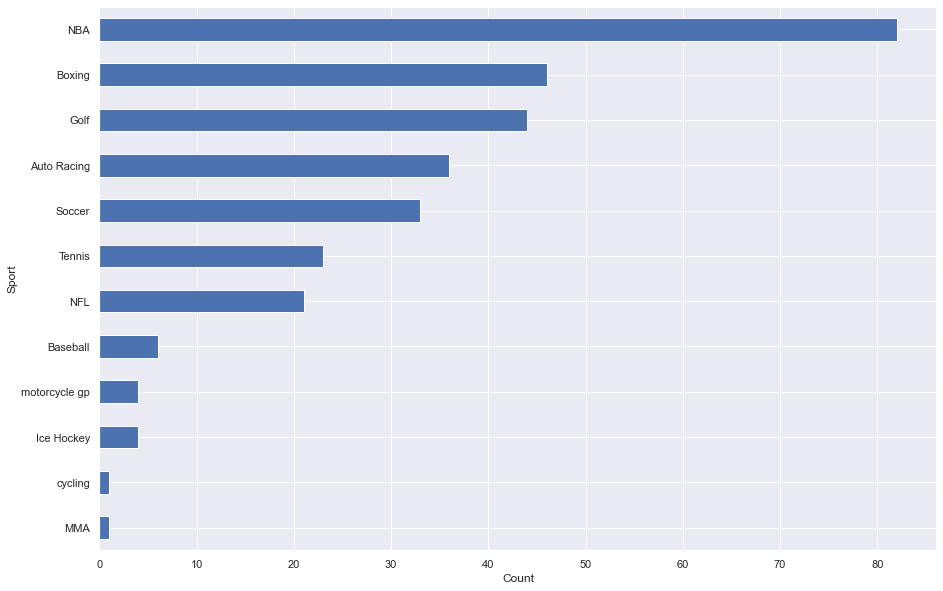

In [33]:
sns.set(rc={'figure.figsize':(15,10)})
df = data.groupby('Sport')['Sport'].count().sort_values()
df.plot(kind='barh')
plt.xlabel('Count')
plt.show()

## The min and max of earnings(in millions of dollars) are 8.1 and 300 respectively

In [34]:
print(min(data['earnings']))
print(max(data['earnings']))

8.1
300.0


## Here is a box plot of the highest-earners by sport. Ignoring the MMA athelete of whom there is only one, we see the soccer players have the highest median, highest upper quartile and highest max (that is not an outlier). Boxers have the absolute highest reported earnings (these are the outliers represented as diamonds). 

## Also in this plot, we can observe the interquartile range. For example, the IQR for tennis players is much greater than it is for NFL players.

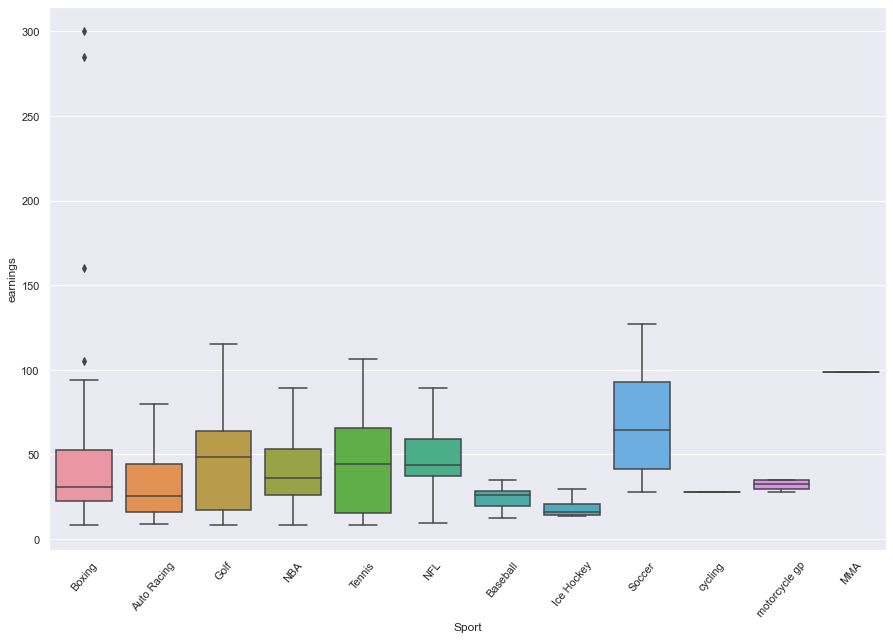

In [35]:
ax = sns.boxplot(x = data['Sport'], y = data['earnings'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.show()

## The outliers in boxing are Floyd Mayweather and Manny Pacquiao

In [36]:
query = "SELECT Name, earnings, Year \
         FROM data \
         WHERE Sport = 'Boxing' \
         ORDER BY earnings DESC\
         LIMIT 4"

df = sqldf(query)
df

,Name,earnings,Year
0,Floyd Mayweather,300.0,2015
1,Floyd Mayweather,285.0,2018
2,Manny Pacquiao,160.0,2015
3,Floyd Mayweather,105.0,2014


# > Of these exceptional earnings reports, who ranks top 5 from 1990-2020? To find this we will need to sum the earnings of every year by name.

## Here is a list of the top 10 with the highest earner being Tiger Woods, and then LeBron James and so on.

In [37]:
data.groupby(by='Name')['earnings'].sum().sort_values(ascending=False).head(10)

Name
Tiger Woods           1373.8
LeBron James           844.8
Floyd Mayweather       840.0
Cristiano Ronaldo      787.1
Roger Federer          781.1
Michael Jordan         738.8
Lionel Messi           715.5
Michael Schumacher     639.0
Kobe Bryant            601.1
Phil Mickelson         519.9
Name: earnings, dtype: float64

## However, some of these earnings go as far back as 1990. If we adjust for inflation and list the sum of their earnerning in terms of 2020 , the top 5 looks like this: Tiger woods at 1.732 billion, Michael Jordan at 1.126 billion, LeBron James at 916.62 million and so on.

In [38]:
Name = ['Tiger Woods','Michael Jordan','LeBron James','Michael Schumacher','Floyd Mayweather']
Earnings = [1732,1126.27,916.62,910.5,909.08]
Sport = ['Golf','Basketball','Basketball','Auto Racing','Boxing']
df = pd.DataFrame({'Name':Name,'Sport':Sport,'Sum of Earnings(adjusted)':Earnings})
df.index = np.arange(1, len(df) + 1)
df

,Name,Sport,Sum of Earnings(adjusted)
1,Tiger Woods,Golf,1732.00
2,Michael Jordan,Basketball,1126.27
3,LeBron James,Basketball,916.62
4,Michael Schumacher,Auto Racing,910.50
5,Floyd Mayweather,Boxing,909.08


## The method of adjusting for inflation was using an inflation calculator found on the American Instistute for Economic Research's website. In 1997 Tiger Woods earned 26.1 million dollars which in 2020-money would be worth 42.09 million. These figures were done for each year of these reports for each athelete. When who to consider for the top 5(adjusted), only the top 10(non-adjusted) were considered because after Phil Mickelson, the sum of earnings dropped off drastically, and inflation would not have been enough to place someone who ranked under Phil Mickelson into the top 5(adjusted).

## Screenshots of the earnings adjustments is placed below and the calculator can be found with this url.

https://www.aier.org/cost-of-living-calculator/?utm_source=Google%20Ads&utm_medium=Google%20CPC&utm_campaign=COLA&gclid=CjwKCAjwpayjBhAnEiwA-7ena_AEqyF9Dijbc26FA52RkW4sJIIv_bSzyD058FYTv06x1fYn_vGtmRoCk40QAvD_BwE

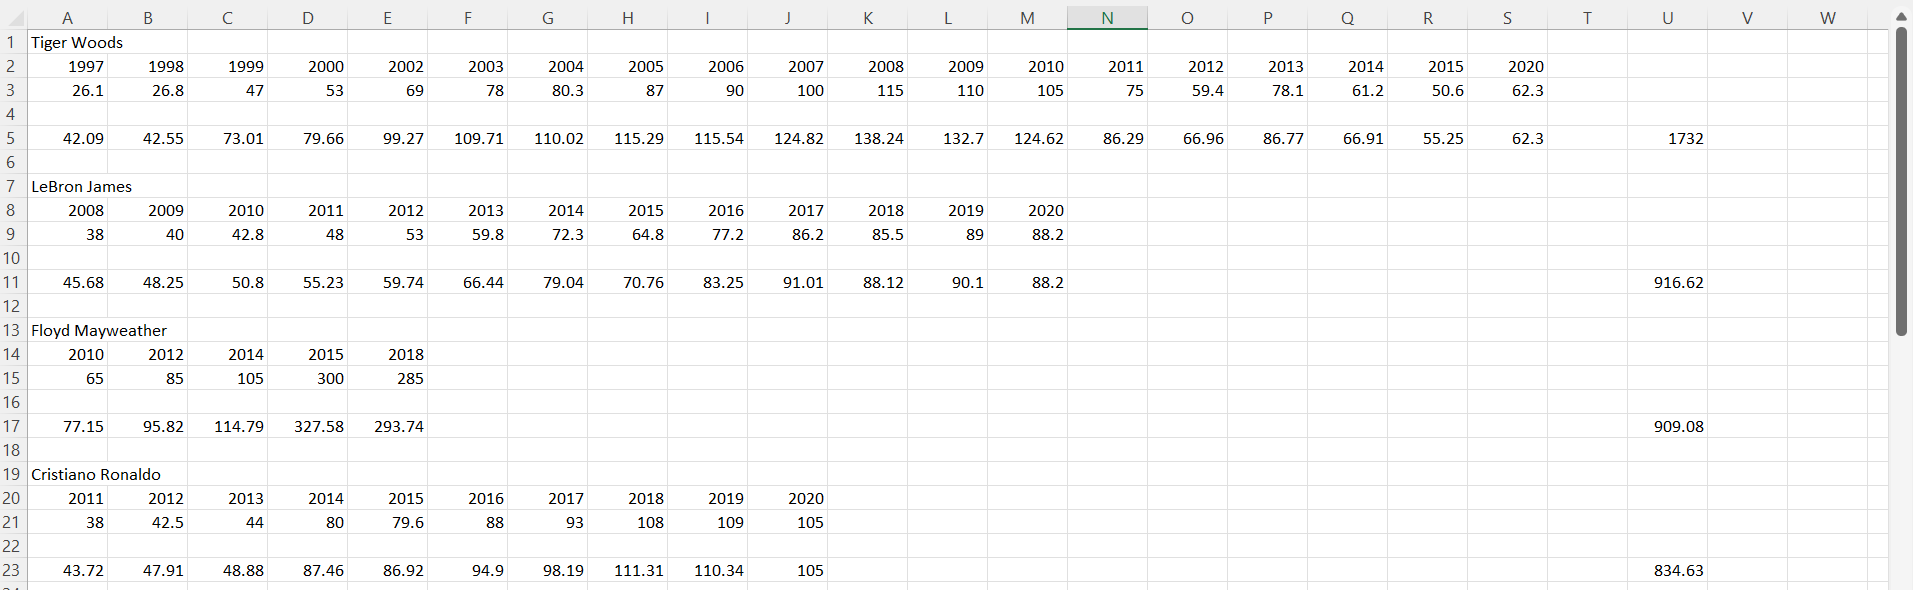

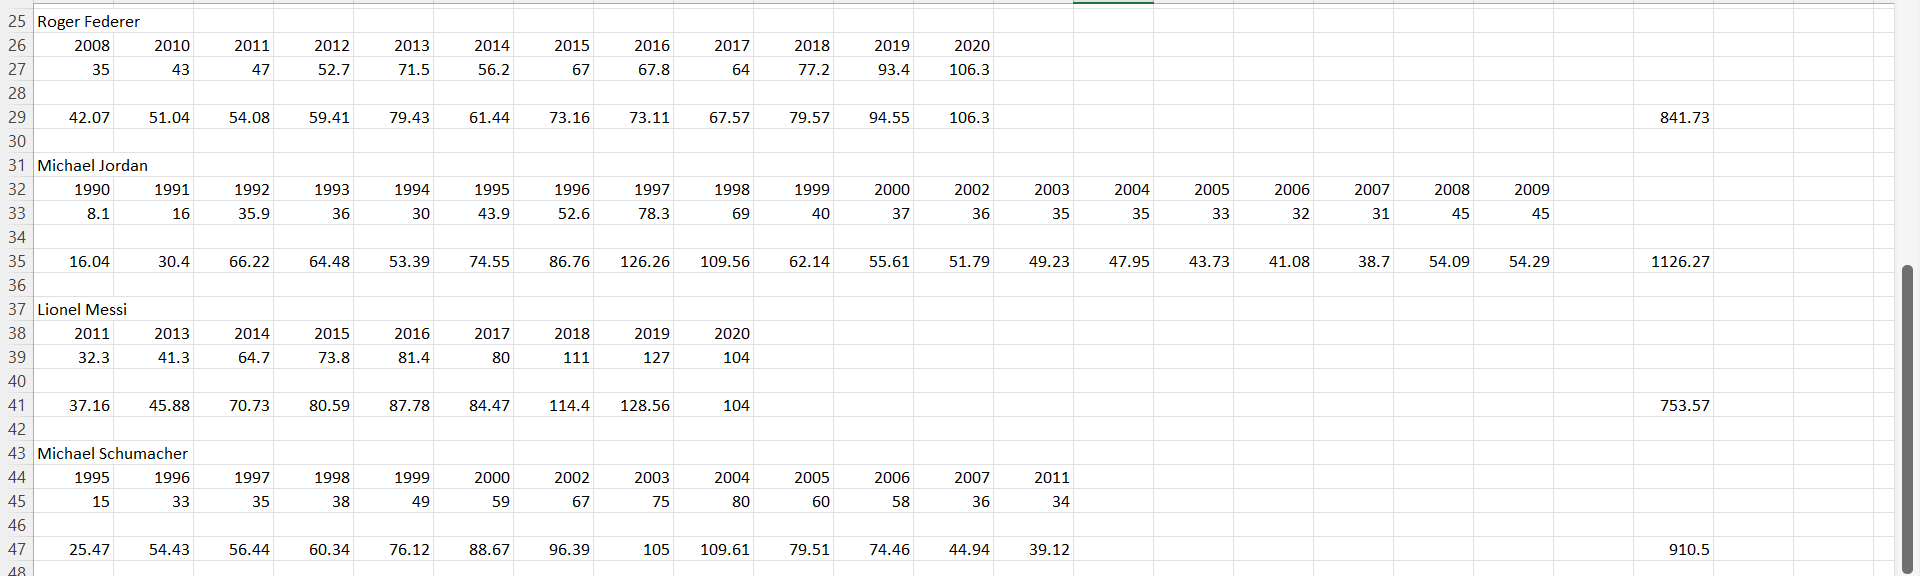

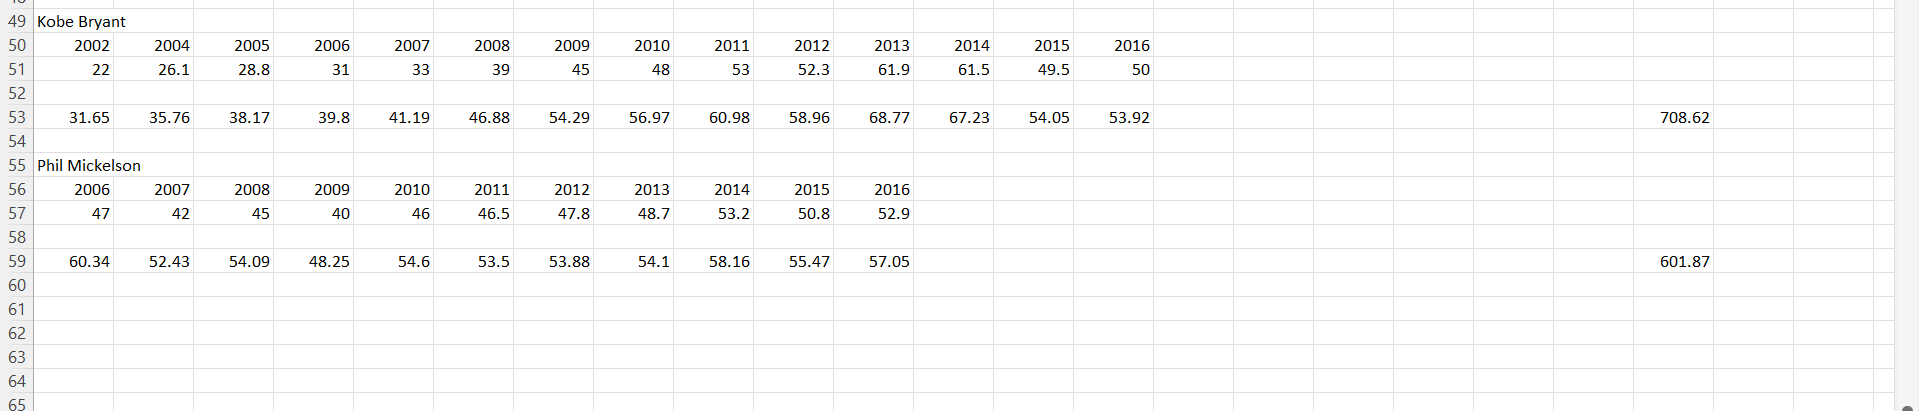

# Thank you for reading!